In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using *only* the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [4]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [5]:
columns = df.columns.to_list()
#these don't need cleaning for missing values
columns.remove('PRIMARY_KEY')
columns.remove('STATE')
columns.remove('YEAR')
#not enough filled entries to make these worthwhile
columns.remove('AVG_MATH_4_SCORE')
columns.remove('AVG_MATH_8_SCORE')
columns.remove('AVG_READING_4_SCORE')
columns.remove('AVG_READING_8_SCORE')

In [6]:
#let's interpolate some data!
for column in columns:
    df[column] = df[column].interpolate()

__1. Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?__

In [7]:
total_revenue = df['TOTAL_REVENUE']

total_expenditure = df['TOTAL_EXPENDITURE']

First, let's try to visualize our data with boxplots and histograms:

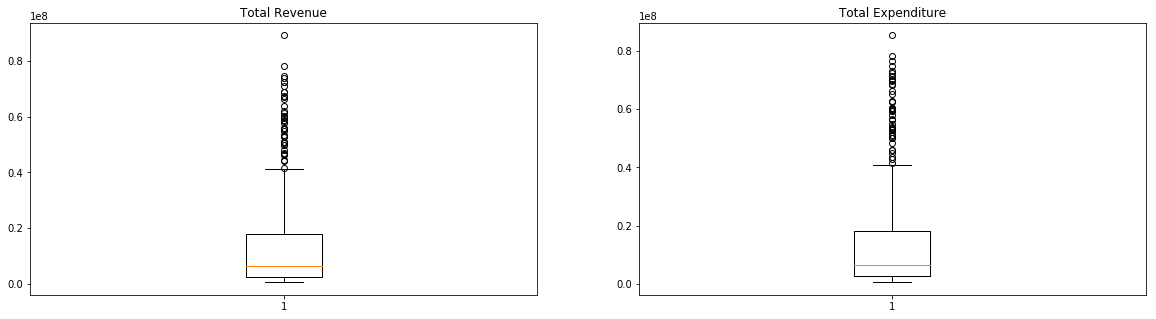

In [8]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.boxplot(total_revenue)
plt.title('Total Revenue')

plt.subplot(1, 2, 2)
plt.boxplot(total_expenditure)
plt.title('Total Expenditure')

plt.show()

Yeah, there looks like there are some outliers! Let's look at histograms just to make sure.

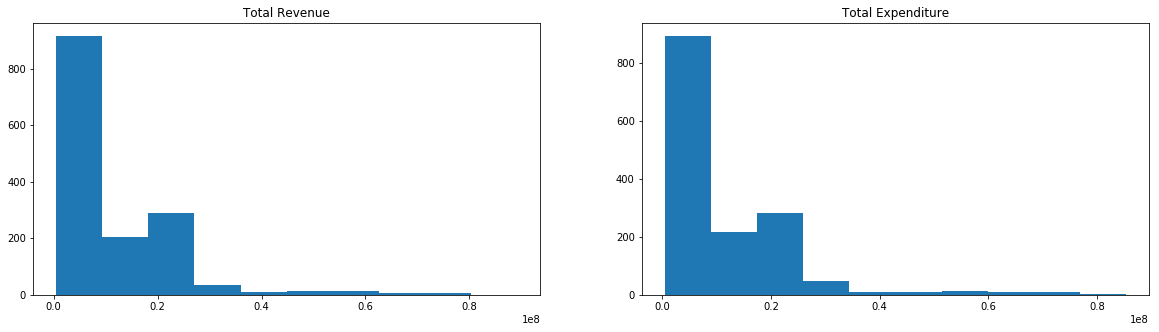

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(total_revenue)
plt.title('Total Revenue')

plt.subplot(1, 2, 2)
plt.hist(total_expenditure)
plt.title('Total Expenditure')

plt.show()

Definitely looks like it visually. Let's try with some more scientific work!

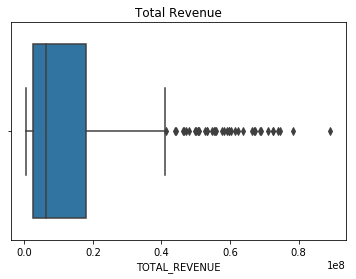

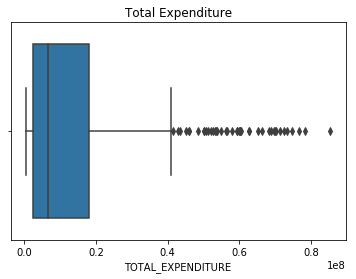

In [10]:
sns.boxplot(x='TOTAL_REVENUE', data=df)
plt.title('Total Revenue')
plt.show()

sns.boxplot(x='TOTAL_EXPENDITURE', data=df)
plt.title('Total Expenditure')
plt.show()

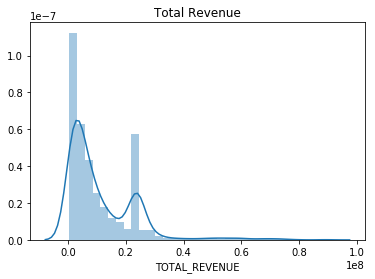

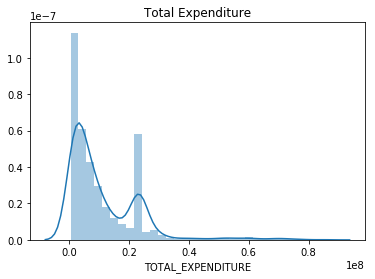

In [12]:
sns.distplot(total_revenue)
plt.title('Total Revenue')
plt.show()

sns.distplot(total_expenditure)
plt.title('Total Expenditure')
plt.show()

Definitely looks like it visually. Let's try with some more scientific work!

#### Using z-scores

In [13]:
from scipy.stats import zscore

z_scores = zscore(total_revenue)
z_scores

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    print("")

The score threshold is: 1
The indices of the outliers:
(array([   4,   56,  108,  137,  150,  161,  190,  213,  241,  264,  292,
        316,  344,  355,  367,  396,  407,  420,  449,  460,  472,  481,
        501,  512,  524,  552,  564,  576,  605,  616,  628,  656,  668,
        680,  685,  708,  719,  731,  737,  758,  760,  766,  771,  784,
        789,  793,  811,  813,  819,  824,  836,  842,  846,  863,  865,
        871,  876,  891,  897,  901,  919,  921,  927,  932,  944,  950,
        954,  971,  973,  976,  979,  984,  997, 1002, 1006, 1023, 1025,
       1028, 1031, 1036, 1048, 1053, 1057, 1075, 1077, 1083, 1088, 1101,
       1106, 1110, 1127, 1129, 1135, 1140, 1152, 1157, 1161, 1178, 1180,
       1183, 1186, 1191, 1203, 1208, 1212, 1229, 1231, 1234, 1237, 1242,
       1254, 1259, 1263, 1280, 1282, 1285, 1286, 1287, 1288, 1289, 1290,
       1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301,
       1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1

In [14]:
z_scores = zscore(total_expenditure)
z_scores

for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
    print("")

The score threshold is: 1
The indices of the outliers:
(array([   4,   56,   85,  137,  150,  161,  190,  213,  241,  264,  292,
        304,  316,  344,  355,  367,  396,  407,  420,  449,  460,  472,
        481,  501,  512,  524,  552,  564,  576,  605,  616,  628,  656,
        668,  680,  685,  708,  719,  731,  737,  758,  760,  766,  771,
        784,  789,  793,  811,  813,  819,  824,  836,  842,  846,  863,
        865,  871,  876,  891,  897,  901,  919,  921,  927,  932,  944,
        950,  954,  971,  973,  979,  984,  997, 1002, 1006, 1023, 1025,
       1031, 1036, 1048, 1053, 1057, 1075, 1077, 1083, 1088, 1101, 1106,
       1110, 1127, 1129, 1135, 1140, 1152, 1157, 1161, 1178, 1180, 1186,
       1191, 1203, 1208, 1212, 1229, 1231, 1237, 1242, 1254, 1259, 1263,
       1280, 1282, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293,
       1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304,
       1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1

### Using tukey's method

In [15]:
q75, q25 = np.percentile(total_revenue, [75, 25])

iqr = q75 - q25
print('TOTAL REVENUE:')
for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    outliers = 0
    print("The score threshold is: {}".format(threshold))
    for i in range(len(total_revenue)):
        if (total_revenue[i] < min_val or total_revenue[i] > max_val):
            outliers += 1
    print('The number of outliers is {}'.format(outliers))
    print('')

TOTAL REVENUE:
The score threshold is: 1.0
The number of outliers is 50

The score threshold is: 1.5
The number of outliers is 40

The score threshold is: 2.0
The number of outliers is 33

The score threshold is: 2.5
The number of outliers is 21

The score threshold is: 3.0
The number of outliers is 12

The score threshold is: 3.5
The number of outliers is 6

The score threshold is: 4.0
The number of outliers is 1

The score threshold is: 4.5
The number of outliers is 1



In [16]:
q75, q25 = np.percentile(total_revenue, [75, 25])

iqr = q75 - q25
print('TOTAL EXPENDITURE')
for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    outliers = 0
    print("The score threshold is: {}".format(threshold))
    for i in range(len(total_expenditure)):
        if (total_expenditure[i] < min_val or total_expenditure[i] > max_val):
            outliers += 1
    print('The number of outliers is {}'.format(outliers))
    print('')

TOTAL EXPENDITURE
The score threshold is: 1.0
The number of outliers is 52

The score threshold is: 1.5
The number of outliers is 42

The score threshold is: 2.0
The number of outliers is 35

The score threshold is: 2.5
The number of outliers is 23

The score threshold is: 3.0
The number of outliers is 14

The score threshold is: 3.5
The number of outliers is 6

The score threshold is: 4.0
The number of outliers is 1

The score threshold is: 4.5
The number of outliers is 0



Well, there are definitely outliers. What to do with them?

__2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.__

First, let's try capping the values with winsorizing

In [19]:
from scipy.stats.mstats import winsorize

winsorized_revenue = winsorize(total_revenue, limits=(0, 0.45))
winsorized_expenditure = winsorize(total_expenditure, limits=(0, 0.45))

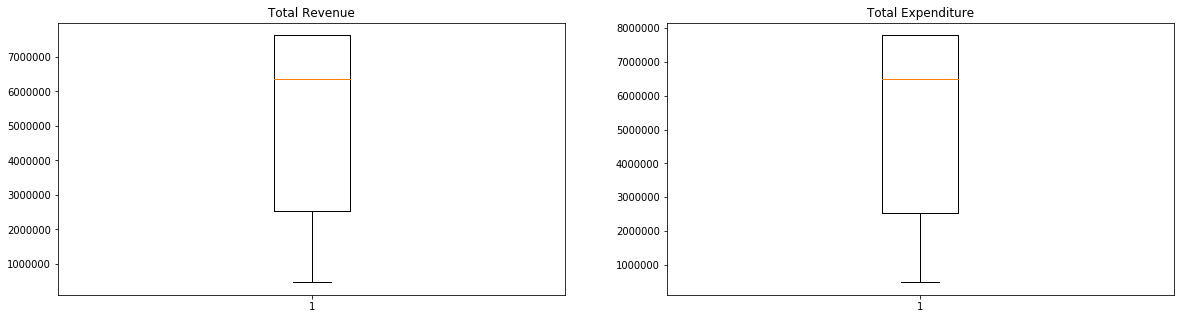

In [20]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.boxplot(winsorized_revenue)
plt.title('Total Revenue')

plt.subplot(1, 2, 2)
plt.boxplot(winsorized_expenditure)
plt.title('Total Expenditure')

plt.show()

Next, let's try tranforming the data!

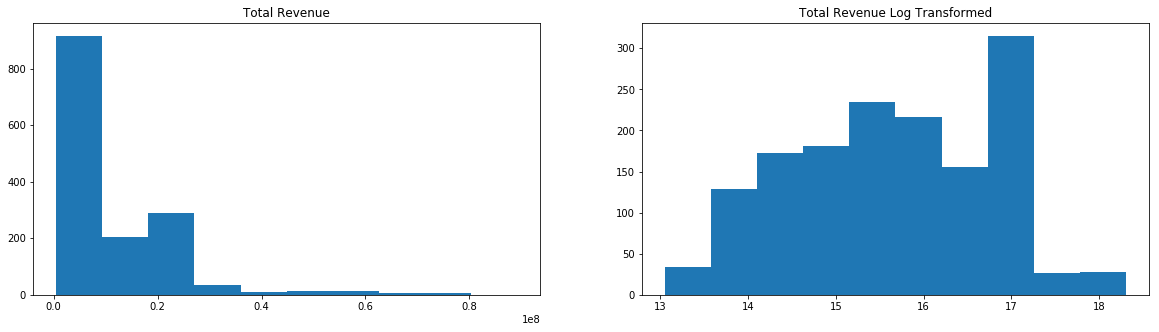

In [21]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(total_revenue)
plt.title('Total Revenue')


plt.subplot(1, 2, 2)
plt.hist(np.log(total_revenue))
plt.title('Total Revenue Log Transformed')

plt.show()

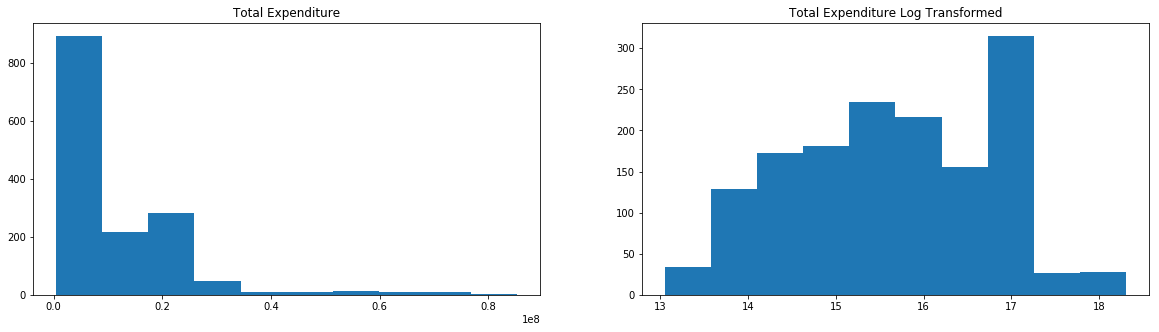

In [22]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(total_expenditure)
plt.title('Total Expenditure')


plt.subplot(1, 2, 2)
plt.hist(np.log(total_revenue))
plt.title('Total Expenditure Log Transformed')

plt.show()

It looks like both are better normalized after transformation!

__3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.__

In [23]:
df['BUDGET_DEFICIT'] = df['TOTAL_REVENUE'] - df['TOTAL_EXPENDITURE']

budget_deficit = df['BUDGET_DEFICIT']

df.head(15)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,BUDGET_DEFICIT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN,25087.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712,77103.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895,-143501.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665,-31063.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN,-878807.0
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687,-79653.0
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904,112964.0
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921,6449.0
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765,-33413.0
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986,200657.0


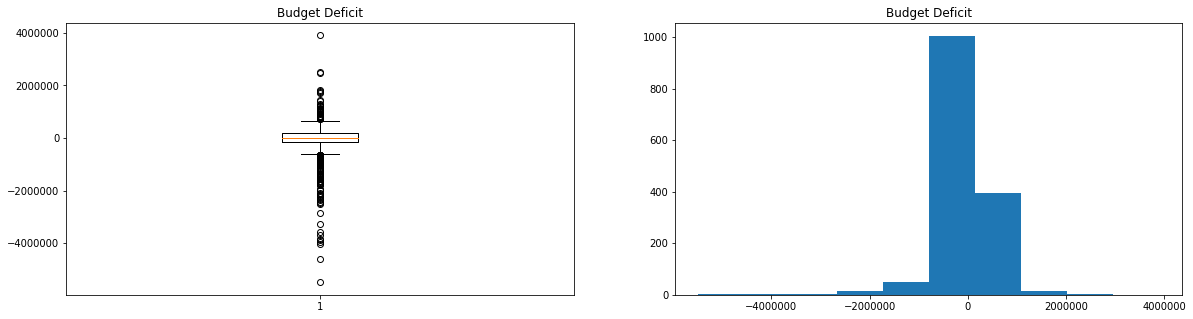

In [24]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.boxplot(budget_deficit)
plt.title('Budget Deficit')

plt.subplot(1, 2, 2)
plt.hist(budget_deficit)
plt.title('Budget Deficit')

plt.show()

In [25]:
z_scores = zscore(budget_deficit)

threshold = 1
print("The score threshold is: {}".format(threshold))
print("The indices of the outliers:")
print(np.where(z_scores > threshold))
print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))
print("")

The score threshold is: 1
The indices of the outliers:
(array([  96,  118,  178,  264,  274,  316,  347,  367,  373,  399,  420,
        472,  690,  739,  746,  749,  791,  802,  816,  868,  902,  922,
        955,  974,  976,  997, 1003, 1006, 1007, 1015, 1026, 1057, 1058,
       1065, 1067, 1075, 1099, 1103, 1110, 1111, 1117, 1119, 1154, 1162,
       1170, 1178, 1183, 1205, 1213, 1219, 1221, 1234, 1254, 1256, 1264,
       1272], dtype=int32),)
Number of outliers is: 56



In [28]:
q75, q25 = np.percentile(budget_deficit, [75, 25])

iqr = q75 - q25


min_val = q25 - (iqr*threshold)
max_val = q75 + (iqr*threshold)
outliers = 0
print("The score threshold is: {}".format(threshold))
for i in range(len(budget_deficit)):
    if (budget_deficit[i] < min_val or budget_deficit[i] > max_val):
        outliers += 1
print('The number of outliers is {}'.format(outliers))
print('The percent of outliers is {}%'.format(outliers / len(budget_deficit) * 100))

The score threshold is: 1
The number of outliers is 198
The percent of outliers is 13.270777479892763%


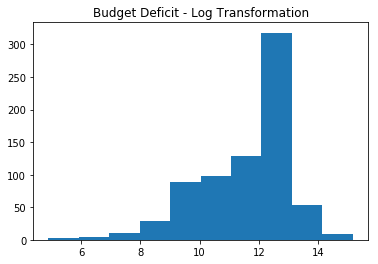

In [29]:
deficit_transformed = np.log(budget_deficit)

plt.hist(deficit_transformed)
plt.title('Budget Deficit - Log Transformation')
plt.show()

In [50]:
winsorized_budget = winsorize(budget_deficit, limits=(0.20, 0.70))

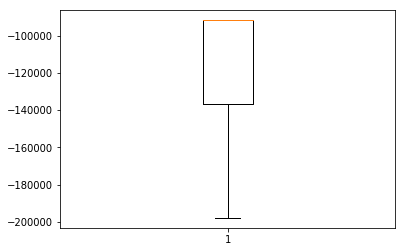

In [51]:
plt.boxplot(winsorized_budget)
plt.show()

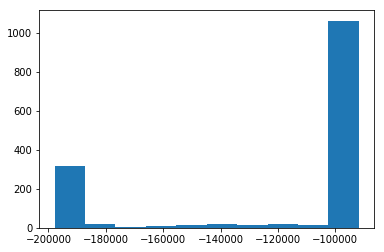

In [52]:
plt.hist(winsorized_budget)
plt.show()

It seems that our best bet for dealing with outliers it to transform the budget deficit.

__4. Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.__

In [73]:
df['WINSORIZED_REVENUE'] = winsorized_revenue
df['WINSORIZED_EXPENDITURE'] = winsorized_expenditure
df['WINSORIZED_BUDGET_DEFICT'] = df['WINSORIZED_REVENUE'] - df['WINSORIZED_EXPENDITURE']

In [74]:
winsorized_budget_deficit = df['WINSORIZED_BUDGET_DEFICT']

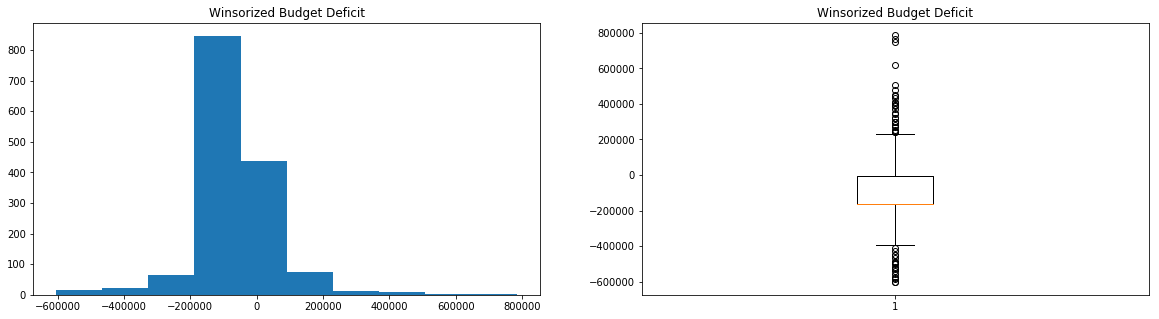

In [89]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(winsorized_budget_deficit)
plt.title('Winsorized Budget Deficit')

plt.subplot(1, 2, 2)
plt.boxplot(winsorized_budget_deficit)
plt.title('Winsorized Budget Deficit')

plt.show()

In [90]:
remove_outliers = np.log(winsorized_budget_deficit)

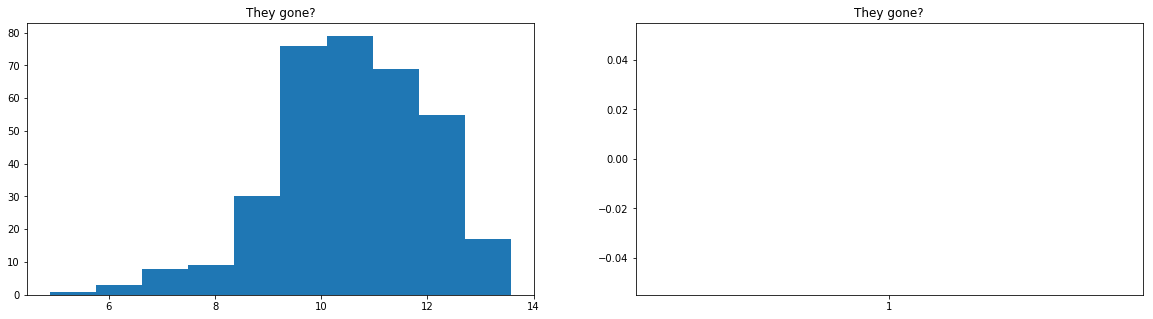

In [91]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.hist(remove_outliers)
plt.title('They gone?')

plt.subplot(1, 2, 2)
plt.boxplot(remove_outliers)
plt.title('They gone?')

plt.show()

__5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?__

In [95]:
deficit_transformed.describe()

count    740.000000
mean      11.694869
std        1.582900
min        4.890349
25%       10.608408
50%       12.157410
75%       12.933653
max       15.175751
Name: BUDGET_DEFICIT, dtype: float64

In [96]:
remove_outliers.describe()

count    347.000000
mean      10.572317
std        1.416129
min        4.890349
25%        9.791883
50%       10.616143
75%       11.592836
max       13.574698
Name: WINSORIZED_BUDGET_DEFICT, dtype: float64

These seem relatively similar. It looks like removing the outliers at first created slightly high values. It could stand to reason that you should create any new features then deal with outliers as this will save you from repeating the process.

__6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?__

I would say that the latter method work as these give you similar results with one less step.